                               Homework2 - Regulariztion with lasso
                                 
                                    Shijun Zhu      sz2664

# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy.random as nprnd
import json
import numpy as np
df = pd.read_csv("/Users/edwar/Desktop/APMA4990 Intro to Data Science/APMAE4990--master/data/hw2data.csv")
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017
5,1.593274,0.568722,-0.114487,0.251630,-1.210856,-0.393734,0.085253,0.099422,-1.530616,0.327623,...,1.363743,0.374138,1.310265,-0.267748,0.213176,-1.203243,1.178031,0.108648,0.044129,9.640786
6,0.338316,1.446792,-0.214495,1.663039,-0.851523,0.422185,2.009219,-0.489815,0.245256,0.877505,...,0.576479,0.065306,-0.773513,0.394948,-0.503890,1.779559,-0.030572,1.577088,-0.812802,4.490042
7,0.613349,1.843700,0.271091,1.136448,-1.738332,0.707135,0.030386,0.765002,0.867665,-2.256250,...,-0.034404,0.519269,-0.672583,1.173611,-1.592229,-0.013649,-0.098345,0.849877,-0.494986,-0.657482
8,1.068731,-0.233866,-0.101805,-0.149077,0.698096,0.853148,-0.604741,-1.408891,-0.981102,0.165183,...,0.424889,-0.271260,-0.683568,-1.537438,-0.101374,0.746666,0.929182,0.229418,0.414406,0.073541
9,0.309724,-0.737456,-1.536920,-0.562255,-1.599511,0.824390,2.491486,1.011855,-0.281238,0.016707,...,1.260308,0.332623,2.495995,0.334872,0.244085,-1.081475,-1.671211,1.029452,-0.395552,-13.133014


b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [22]:
y = df['y']
X = df.drop(labels='y',axis=1)


c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

Answer: From the below figure we could find that regularization strength = 0.001 optimizes the R^2

C:\Users\edwar\Anaconda3.6\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


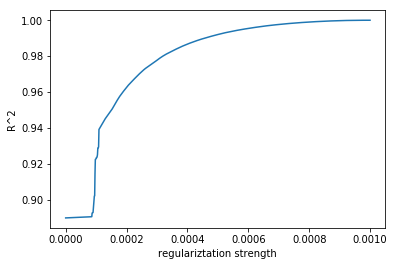

Text(0,0.5,'R^2')

In [23]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Lasso
# split the test data and trainning data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

alphas = np.logspace(-8,-3,1000)
scores = []
for alpha in alphas:
    regr = Lasso(alpha=alpha)
    regr.fit(X_train, y_train)    # train the model
    scores.append(regr.score(X_test,y_test))
    
plt.plot(alphas,scores)
plt.show()
plt.xlabel('regulariztation strength')
plt.ylabel('R^2')

d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

C:\Users\edwar\Anaconda3.6\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


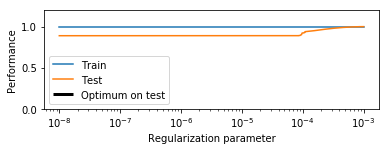

In [29]:
%matplotlib inline

plt.subplot(2, 1, 1)

# Fill these in
alphas = np.logspace(-8,-3,1000)
train_errors=[]
test_errors=[]
alpha_optim=0

for alpha in alphas:

    regr = Lasso(alpha=alpha)
    regr.fit(X_train, y_train)    # train the model
    train_errors.append(regr.score(X_train, y_train))
    test_errors.append(regr.score(X_test, y_test)) 


    
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


plt.show()


e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

Answer： The reason why there are so many zero is some unnecessary elements were eliminated by the lasso regression.

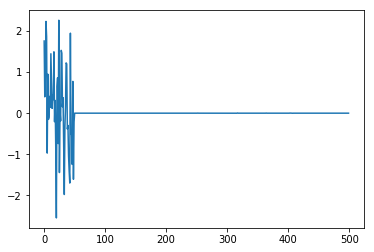

In [30]:
regr.set_params(alpha = alpha_optim)
plt.plot(regr.coef_)
plt.show()

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

Answer: Since the R^2 is about 0.8, It doesn not work very well on all random subsets.

R^2 =  [ 0.7773837   0.81429647  0.84440743  0.85208258  0.75671921]


C:\Users\edwar\Anaconda3.6\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\edwar\Anaconda3.6\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\edwar\Anaconda3.6\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\edwar\Anaconda3.6\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\edwar\Anaconda3.6\lib\site-packages\sklearn\model_selec

<Container object of 5 artists>

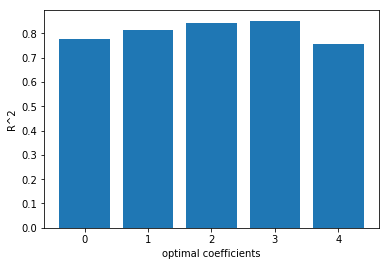

In [36]:
from sklearn.model_selection import cross_val_score
regr = Lasso(alpha = alpha_optim)
score = cross_val_score(regr2, X, y, cv=5)
print ('R^2 = ', score)

plt.show()
plt.xlabel("optimal coefficients")
plt.ylabel("R^2")
plt.bar(range(5),score)

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [38]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs



scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_optim)

C:\Users\edwar\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\edwar\Anaconda3.6\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


In [39]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

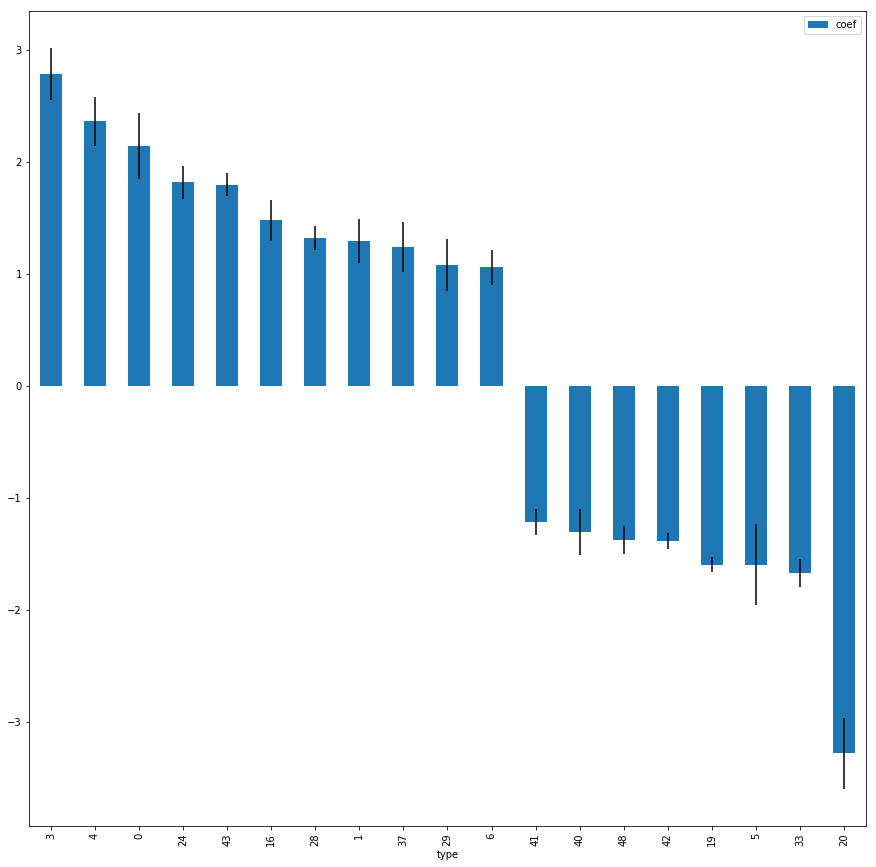

In [43]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))